In [1]:
import pandas as pd
from core.analysis import *

<Figure size 432x288 with 0 Axes>

## Data Prep

In [2]:
db = access_db()


In [3]:
trials = get_trial_data(db)
participants = get_participant_data(db)
user_data = participants[(participants['completedTask'] == 1) & (participants.index > 4) 
                         & ~(participants['workerID'].str.startswith("pilot"))] #excluding my data/Jon/Stephan
results = trials[trials['userID'].isin(user_data['userID'])]
users = user_data['userID']

## Consistency

In [4]:
repeat_corr = all_repeats(results, users, plot = False) #self correlation
shared_results = results[results['trialType'] == 'shared']
shared_corrs = group_consistency(shared_results, users) #shared correlation
user_time_word_changes = get_time_and_changes(results, user_data) #metadata
consistency = pd.DataFrame({'Group Consistency': shared_corrs, 'Self Consistency': repeat_corr})
corrs = user_time_word_changes.merge(consistency, on = user_time_word_changes.index).drop('key_0', axis = 1)
corrs['Correlation with SN'] = my_correlations(participants, trials, results, users) #vs gold standard

/Users/sathvik/Desktop/Berkeley/Research/thesis/codebase/core/analysis.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['changes'] = user_changes['prevChanged'].values


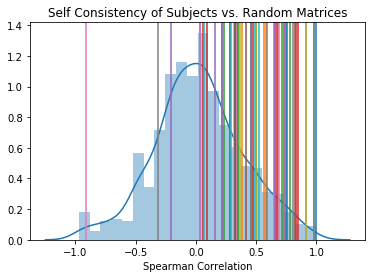

In [19]:
random_self = simulate_self_correlation(1000, db)


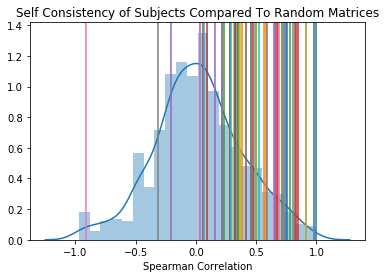

In [25]:
plot_consistency_hist(random_self, corrs['Self Consistency'], 
                      "Self Consistency of Subjects Compared To Random Matrices", legend = False)

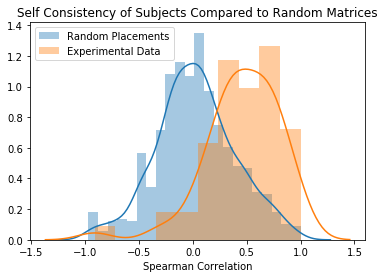

In [31]:
sns.distplot(random_self, label = "Random Placements")
sns.distplot(corrs['Self Consistency'], label = "Experimental Data")
plt.title("Self Consistency of Subjects Compared to Random Matrices")
plt.xlabel("Spearman Correlation")
plt.legend()
plt.savefig("../../results/figures/self_consistency.png")

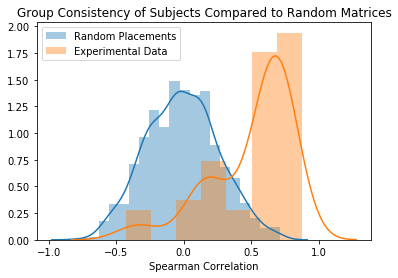

In [33]:
sns.distplot(random_group, label = "Random Placements")
sns.distplot(corrs['Group Consistency'], label = "Experimental Data")
plt.title("Group Consistency of Subjects Compared to Random Matrices")
plt.xlabel("Spearman Correlation")
plt.legend()
plt.savefig("../../results/figures/group_consistency.png")

In [15]:
len(corrs[corrs['Self Consistency'] > 0.2])

51

In [17]:
len(corrs[corrs['Group Consistency'] > 0.4])

43

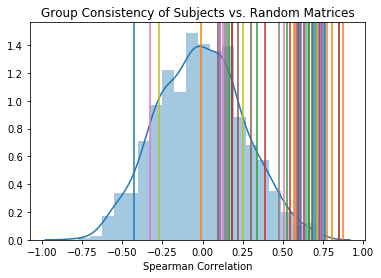

In [8]:
random_group = [random_vs_all(shared_results) for _ in range(1000)]
plot_consistency_hist(random_group, corrs['Group Consistency'], 
                      "Group Consistency of Subjects vs. Random Matrices", legend = False)

Exclusion criteria: Self below 0.2?

In [22]:
corrs[corrs['Self Consistency'] > 0.2].drop('userID', axis = 1).apply(np.mean) 

timeTaken              792.746163
changes                  8.755102
Group Consistency        0.514935
Self Consistency         0.569659
Correlation with SN      0.520277
dtype: float64

In [9]:
len(corrs[corrs['Self Consistency'] > 0.2])

27

## MDS

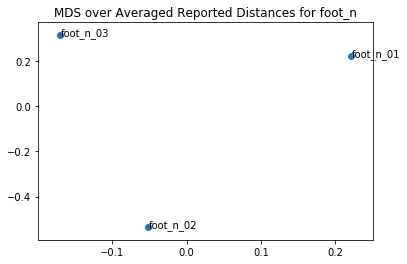

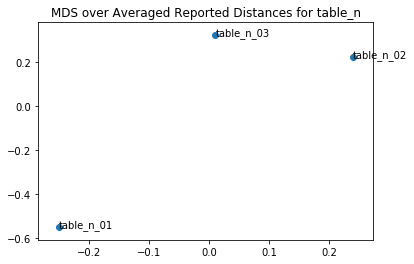

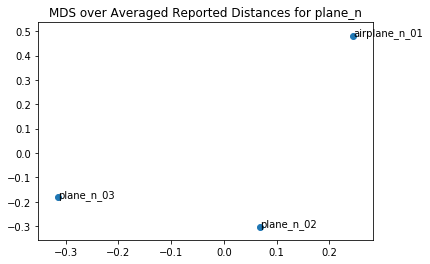

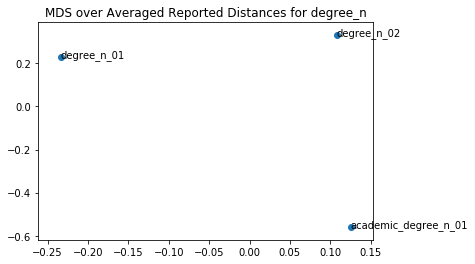

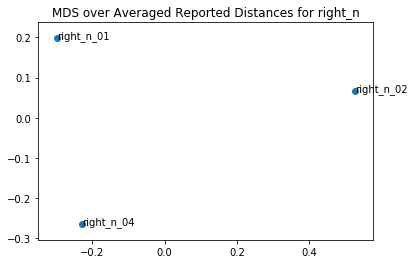

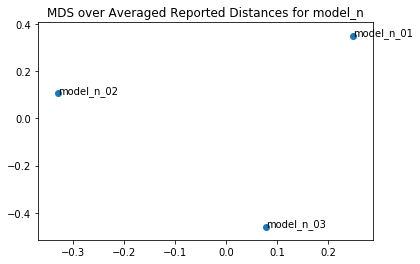

In [7]:
incl_users = corrs[corrs['Self Consistency'] > 0.2]['userID'].tolist()
plot_all_mds(results, incl_users, 'shared', db)

## Test Trials

Number of trials we got for each test/repeat word

In [20]:
test_data = results[(results['userID'].isin(incl_users)) & (results['trialType'].isin(['test', 'repeat']))]
lemma_counts = test_data['lemma'].value_counts()
lemma_counts / [get_num_senses(l, db) for l in lemma_counts.index]

world_n       26.0
life_n        21.0
consider_v    21.0
door_n        32.0
time_n        19.0
lead_v        13.0
indicate_v    22.0
way_n         17.0
case_n        21.0
face_n        20.0
drive_v       19.0
cover_v       15.0
point_n       15.0
raise_v       18.0
area_n        23.0
death_n       16.0
put_v         21.0
glass_n       21.0
book_n        21.0
ask_v         21.0
school_n      20.0
light_n       20.0
begin_v       19.0
heart_n       19.0
produce_v     19.0
man_n         11.0
Name: lemma, dtype: float64